## Math Wizard

## TensorFlow Deep Learning Model

### Import Libraries

In [1]:
# Basic Python Libraries
import os

# Common ML Libraries
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt

# Sklearn Modules
from sklearn.model_selection import train_test_split

In [2]:
# TensorFlow
import tensorflow as tf
from tensorflow import keras

### Load Image Dataset

In [3]:
BASE_DIR = 'dataset/math-symbols-np'
dataset_np_file = os.path.join(BASE_DIR, 'math_symbols')
dataset_np_file_saved = dataset_np_file + '.npz'

MODELS_BASE = 'generated_models'
tflite_model_path = os.path.join(MODELS_BASE, 'math_symbols_model.tflite')

In [4]:
if not os.path.exists(MODELS_BASE):
    os.makedirs(MODELS_BASE)

In [5]:
def load_np_dataset():
    math_symbols_np = np.load(dataset_np_file_saved)
    math_symbols_img = math_symbols_np['image_symbols']
    math_symbols_labels = math_symbols_np['image_labels']
    return math_symbols_img, math_symbols_labels

In [6]:
math_symbols_img, math_symbols_labels = load_np_dataset()

### Normalize Images

In [7]:
# Normalize the input image so that each pixel value is between 0 to 1.
math_symbols_img = math_symbols_img / 255.0

In [8]:
math_symbols_img.shape, math_symbols_labels.shape

((69018, 28, 28), (69018,))

In [9]:
math_symbols_img[0].shape

(28, 28)

### Split Image dataset to Training and Testing

In [10]:
train_math_symbols , test_math_symbols, train_math_labels, test_math_labels = train_test_split(math_symbols_img, 
                                                                                               math_symbols_labels, 
                                                                                               test_size=0.3, 
                                                                                               random_state=42)

In [11]:
train_math_symbols.shape, train_math_labels.shape

((48312, 28, 28), (48312,))

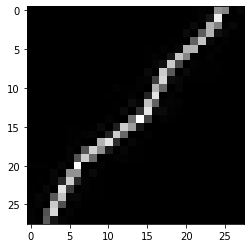

Size (28, 28)
Label 2


In [12]:
test_index = 3
plt.figure(figsize=(4, 4))
plt.imshow(math_symbols_img[test_index], cmap=plt.cm.gray)
plt.show()

print('Size', math_symbols_img[test_index].shape)
print('Label', math_symbols_labels[test_index])

### Normalize Pixels

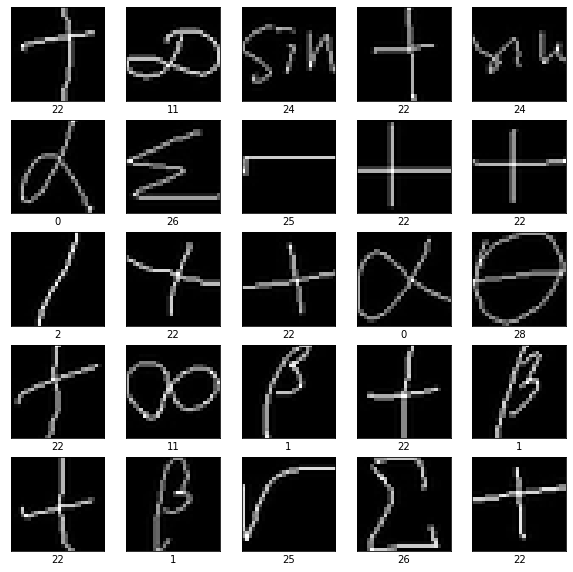

In [13]:
# Show the first 25 images in the training dataset.
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_math_symbols[i], cmap=plt.cm.gray)
  plt.xlabel(train_math_labels[i])
plt.show()

In [14]:
image_pixel_size = train_math_symbols.shape[1]
output_classes_size = len(np.unique(math_symbols_labels))
image_pixel_size, output_classes_size

(28, 29)

### Train TensorFlow Neural Network Model

In [15]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Reshape(target_shape=(image_pixel_size, image_pixel_size, 1)),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(input_shape=(image_pixel_size, image_pixel_size)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(output_classes_size, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Train the digit classification model
model.fit(train_math_symbols, train_math_labels, epochs=10)

Train on 48312 samples
Epoch 1/10
48312/48312 [==============================] - 7s 142us/sample - loss: 0.3863 - accuracy: 0.8961
Epoch 2/10
48312/48312 [==============================] - 4s 90us/sample - loss: 0.1098 - accuracy: 0.9664
Epoch 3/10
48312/48312 [==============================] - 4s 92us/sample - loss: 0.0747 - accuracy: 0.9763
Epoch 4/10
48312/48312 [==============================] - 5s 100us/sample - loss: 0.0577 - accuracy: 0.9821
Epoch 5/10
48312/48312 [==============================] - 5s 106us/sample - loss: 0.0444 - accuracy: 0.9857
Epoch 6/10
48312/48312 [==============================] - 4s 91us/sample - loss: 0.0374 - accuracy: 0.9882
Epoch 7/10
48312/48312 [==============================] - 5s 109us/sample - loss: 0.0326 - accuracy: 0.9897 - loss: 0.0325 - accuracy: 
Epoch 8/10
48312/48312 [==============================] - 4s 89us/sample - loss: 0.0260 - accuracy: 0.9909
Epoch 9/10
48312/48312 [==============================] - 4s 90us/sample - loss: 0.0247 -

### Evaluate Trained Model

In [17]:
test_loss, test_acc = model.evaluate(test_math_symbols, test_math_labels)
print('Test accuracy:', test_acc)

20706/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 0.998696


### Predict Image Class using Trained Model

In [18]:
test_math_predictions = model.predict(test_math_symbols)

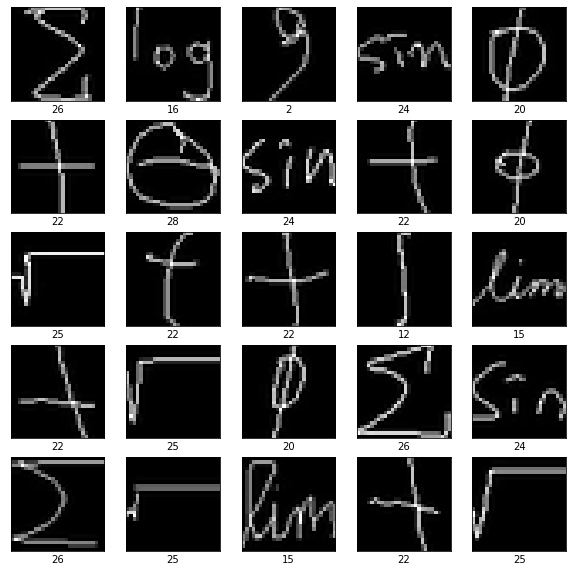

In [19]:
# Show the first 25 images in the training dataset.
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_math_symbols[i], cmap=plt.cm.gray)
  plt.xlabel(np.argmax(test_math_predictions[i]))
plt.show()

### Convert Trained Model to TensorFlow Lite

In [20]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

f = open(tflite_model_path, "wb")
f.write(tflite_model)
f.close()